<h3>Generation of SALCs in Octahedral and Tetrahedral Coordination Environments</h3>

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h5>Local Imports</h5>

In [145]:
from SALC_functions import *

Octahedral Symmetry Group, $O_h$

The operations which compose the octahedral point group, $O_h$, of an octahedron with vertices at integer positions nearest to the origin as follows

$$(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)$$

Will be stored in a dictionary for later use.

In [146]:
### Vertices of the Octahedron ###

octahedral_vertices = np.array([[1,  0, -1,  0,  0,  0],
                                [0,  1,  0, -1,  0,  0],
                                [0,  0,  0,  0,  1, -1]], dtype=np.float64)



### The group symmetry elements as a list of the conjugacy classes of the group ###

#Identity
E = [np.eye(3)]

#180° rotation about the pricipal axes
C_2_4 = [rotation([ 1, 0, 0], np.pi),
         rotation([ 0, 1, 0], np.pi), 
         rotation([ 0, 0, 1], np.pi)]

#90° rotations about the principal axes
C_1_4 = [rotation([ 1, 0, 0], np.pi/2), 
         rotation([ 0, 1, 0], np.pi/2), 
         rotation([ 0, 0, 1], np.pi/2), 
         rotation([ 1, 0, 0],-np.pi/2), 
         rotation([ 0, 1, 0],-np.pi/2), 
         rotation([ 0, 0, 1],-np.pi/2)]

#180° rotation about the bisectors of the edges
C_2_prime = [rotation([ 1, 1, 0], np.pi), 
             rotation([-1, 1, 0], np.pi), 
             rotation([ 1, 0, 1], np.pi), 
             rotation([ 0, 1, 1], np.pi), 
             rotation([-1, 0, 1], np.pi), 
             rotation([ 0,-1, 1], np.pi)]

#120° rotation about the triangular face normal
C_1_3 = [rotation([ 1, 1, 1], 2*np.pi/3), 
         rotation([-1, 1, 1], 2*np.pi/3), 
         rotation([-1,-1, 1], 2*np.pi/3), 
         rotation([ 1,-1, 1], 2*np.pi/3), 
         rotation([ 1, 1, 1],-2*np.pi/3), 
         rotation([-1, 1, 1],-2*np.pi/3), 
         rotation([-1,-1, 1],-2*np.pi/3), 
         rotation([ 1,-1, 1],-2*np.pi/3)]

#Inversion
i = [-np.eye(3)]

#Inversion, then 180° rotation about the pricipal axes
iC_2_4 = [-np.eye(3) @ element for element in C_2_4]

#Inversion, then 90° rotations about the principal axes
iC_1_4 = [-np.eye(3) @ element for element in C_1_4]

#Inversion, 180° rotation about the bisectors of the edges
iC_2_prime = [-np.eye(3) @ element for element in C_2_prime]

#Inversion, 120° rotation about the triangular face normal
iC_1_3 = [-np.eye(3) @ element for element in C_1_3]

oct_classes = [E, C_2_4, C_1_4, C_2_prime, C_1_3, i, iC_2_4, iC_1_4, iC_2_prime, iC_1_3]
oct_class_size = [len(cls) for cls in oct_classes]
oct_order = sum(oct_class_size)

group_elements = []
for cls in oct_classes:
    for element in cls:
        group_elements.append(element)

#Check that none of the group elements are equal
for i in range(oct_order):
    for j in range(i+1, oct_order):
        if array_equal(group_elements[i], group_elements[j]):
            print("Elements {i}, {j} are equal".format(i=i, j=j))

#Check the closure of the group
for i in range(oct_order):
    for j in range(oct_order):
        product = group_elements[i] @ group_elements[j]
        included = False
        for k in range(oct_order):
            if array_equal(product, group_elements[k]):
                included = True
                break
        if not included:
            print("The product of elements {i} and {j} is not in the group".format(i=i, j=j))

#Check that the vertices are invariant under the group actions
for i in range(oct_order):
    transformed_vertices = group_elements[i] @ octahedral_vertices
    p = permutation_matrix(octahedral_vertices, transformed_vertices)
    if not valid_permutation_matrix(p):
        print("Element {i} does not leave the vertices invariant".format(i=i))



            

### Octahedral Character Table (Dresselhaus Table A.31)###

oct_char_table = {
    "A_plus_1"  : np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    "A_plus_2"  : np.array([1, 1,-1,-1, 1, 1, 1,-1,-1, 1]),
    "E_plus"    : np.array([2, 2, 0, 0,-1, 2, 2, 0, 0,-1]),
    "T_minus_1" : np.array([3,-1, 1,-1, 0,-3, 1,-1, 1, 0]),
    "T_minus_2" : np.array([3,-1,-1, 1, 0,-3, 1, 1,-1, 0]),
    "A_minus_1" : np.array([1, 1, 1, 1, 1,-1,-1,-1,-1,-1]),
    "A_minus_2" : np.array([1, 1,-1,-1, 1,-1,-1, 1, 1,-1]),
    "E_minus"   : np.array([2, 2, 0, 0,-1,-2,-2, 0, 0, 1]),
    "T_plus_1"  : np.array([3,-1, 1,-1, 0, 3,-1, 1,-1, 0]),
    "T_plus_2"  : np.array([3,-1,-1, 1, 0, 3,-1,-1, 1, 0]),
}
#dimensionality of the IRs
oct_l = [1,1,2,3,3,1,1,2,3,3]


Tetrahedral Symmetry Group, $T_d$

The operations which compose the tetrahedral point group, $T_d$, of a tetrahedron with the following vertices

$$(1, 0, -\frac{\sqrt{2}}{2}), (-1, 0, -\frac{\sqrt{2}}{2}), (0, 1, \frac{\sqrt{2}}{2}), (0, -1, \frac{\sqrt{2}}{2})$$


In [147]:
### Vertices of the Tetrahedron ###

tetrahedral_vertices = np.array([[            1,           -1,            0,            0],
                                 [            0,            0,            1,           -1],
                                 [-np.sqrt(2)/2,-np.sqrt(2)/2, np.sqrt(2)/2, np.sqrt(2)/2]], dtype=np.float64)





### The group symmetry elements as a list of the conjugacy classes of the group ###

#Identity
E = [np.eye(3)]

#120° rotations about the vertices
C_1_3 = [rotation([ 1, 0, -np.sqrt(2)/2], 2*np.pi/3),
         rotation([-1, 0, -np.sqrt(2)/2], 2*np.pi/3),
         rotation([ 0, 1,  np.sqrt(2)/2], 2*np.pi/3),
         rotation([ 0,-1,  np.sqrt(2)/2], 2*np.pi/3),
         rotation([ 1, 0, -np.sqrt(2)/2], 4*np.pi/3),
         rotation([-1, 0, -np.sqrt(2)/2], 4*np.pi/3),
         rotation([ 0, 1,  np.sqrt(2)/2], 4*np.pi/3),
         rotation([ 0,-1,  np.sqrt(2)/2], 4*np.pi/3)]

#180° rotation about the edge bisectors
C_1_2 = [rotation([ 0, 0, 1], np.pi),
         rotation([ 1, 1, 0], np.pi),
         rotation([-1, 1, 0], np.pi)]

#mirror reflections
sigma_d = [reflection([ 0, 1, 0]),
           reflection([ np.sqrt(2),-np.sqrt(2), 2]),
           reflection([ np.sqrt(2), np.sqrt(2), 2]),
           reflection([ np.sqrt(2), np.sqrt(2),-2]),
           reflection([-np.sqrt(2), np.sqrt(2), 2]),
           reflection([ 1, 0, 0])]

#90° roto-reflection about the edge bisectors
S_1_4 = [rotation([ 0, 0, 1], np.pi/2)@reflection([ 0, 0, 1]),
         rotation([ 1, 1, 0], np.pi/2)@reflection([ 1, 1, 0]),
         rotation([-1, 1, 0], np.pi/2)@reflection([-1, 1, 0]),
         rotation([ 0, 0, 1], 3*np.pi/2)@reflection([ 0, 0, 1]),
         rotation([ 1, 1, 0], 3*np.pi/2)@reflection([ 1, 1, 0]),
         rotation([-1, 1, 0], 3*np.pi/2)@reflection([-1, 1, 0])]

tet_classes = [E, C_1_3, C_1_2, sigma_d, S_1_4]
tet_class_size = [len(cls) for cls in tet_classes]
tet_order = sum(tet_class_size)

group_elements = []
for cls in tet_classes:
    for element in cls:
        group_elements.append(element)

#Check that none of the group elements are equal
for i in range(tet_order):
    for j in range(i+1, tet_order):
        if array_equal(group_elements[i], group_elements[j]):
            print("Elements {i}, {j} are equal".format(i=i, j=j))

#Check the closure of the group
for i in range(tet_order):
    for j in range(tet_order):
        product = group_elements[i] @ group_elements[j]
        included = False
        for k in range(tet_order):
            if array_equal(product, group_elements[k]):
                included = True
                break
        if not included:
            print("The product of elements {i} and {j} is not in the group".format(i=i, j=j))
            print(np.around(product, 3))

#Check that the vertices are invariant under the group actions
for i in range(tet_order):
    transformed_vertices = group_elements[i] @ tetrahedral_vertices
    p = permutation_matrix(tetrahedral_vertices, transformed_vertices)
    if not valid_permutation_matrix(p):
        print("Element {i} does not leave the vertices invariant".format(i=i))




### Tetrahedral Character Table (Dresselhaus Table A.32)###

tet_char_table = {
    "A_1" : np.array([1, 1, 1, 1, 1]),
    "A_2" : np.array([1, 1, 1,-1,-1]),
    "E"   : np.array([2,-1, 2, 0, 0]),
    "T_1" : np.array([3, 0,-1,-1, 1]),
    "T_2" : np.array([3, 0,-1, 1,-1]),
}
#dimensionality of the IRs
tet_l  = [1,1,2,3,3]

<h3>S-orbital Representations</h3>

Since S-orbitals have spherical symmetry they can be modeled as points. The S-orbitals at each of the vertices can therefore be represented as vectors which point to the vertex on which the S-orbital is located.

In [148]:
def array_equal(a1: np.array, a2: np.array, eps=0.0001) -> np.array:
    """Check if two arrays are equal up to a accuracy factor eps"""
    diff = np.abs(a1 - a2)
    return np.all(diff < eps)


def permutation_matrix(vertices, transformed_vertices):
    """generate a permutation matrix associated with a transformation matrix acting on a set of vertices"""
    _, cols = vertices.shape
    perm_mat = np.zeros((cols, cols), dtype=np.int8)
    for i in range(cols):
        for j in range(cols):
            if array_equal(vertices[:,i], transformed_vertices[:,j]):
                perm_mat[i,j] = 1
                break
    return perm_mat


def point_representation(element : np.ndarray, vertices : np.ndarray) -> np.ndarray:
    """generate a list of representations of the group elements based on their action of the vertices, return as list of permuation matrices"""
    transformed_vertices = element @ vertices
    return permutation_matrix(vertices, transformed_vertices)


#Projection Operator for Functions with Spherical Symmetry
def point_proj_operator(IR_key: str, class_list: list, char_table: dict, IR_dim: list, vertices) -> np.ndarray:
    """generate the projection operator"""
    _, basis_dim = vertices.shape
    proj_operator = np.zeros((basis_dim,basis_dim), dtype=np.float64)
    h = sum([len(cls) for cls in class_list])
    for i, cls in enumerate(class_list):
        for element in cls:
            proj_operator += char_table[IR_key][i] * point_representation(element, vertices)
    for i, key in enumerate(char_table.keys()):
        if key == IR_key:
            n = i
    proj_operator *= (IR_dim[n]/h)
    return proj_operator
      

<h5>Octahedral S-orbital SALCs</h5>

In [149]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in oct_char_table.items():

    rep_chars = []
    for cls in oct_classes:
        rep = point_representation(cls[0], octahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(oct_class_size, IR_chars)
    num = int((1/oct_order)*np.dot(row, rep_chars))
    print("{n} SALC(s) have {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) have A_plus_1 symmetry
0 SALC(s) have A_plus_2 symmetry
1 SALC(s) have E_plus symmetry
1 SALC(s) have T_minus_1 symmetry
0 SALC(s) have T_minus_2 symmetry
0 SALC(s) have A_minus_1 symmetry
0 SALC(s) have A_minus_2 symmetry
0 SALC(s) have E_minus symmetry
0 SALC(s) have T_plus_1 symmetry
0 SALC(s) have T_plus_2 symmetry


Defining the Projection Operator for Functions with Spherical Symmetry

In [150]:
def point_proj_operator(IR_key: str, class_list: list, char_table: dict, IR_dim: list, vertices) -> np.ndarray:
    """generate the projection operator"""
    _, basis_dim = vertices.shape
    proj_operator = np.zeros((basis_dim,basis_dim), dtype=np.float64)
    h = sum([len(cls) for cls in class_list])
    for i, cls in enumerate(class_list):
        for element in cls:
            proj_operator += char_table[IR_key][i] * point_representation(element, vertices)
    for i, key in enumerate(char_table.keys()):
        if key == IR_key:
            n = i
    proj_operator *= (IR_dim[n]/h)
    return proj_operator


def s_orbital_plot(salcs: list, vertices: np.ndarray):
    """plot the s-orbital SALC in the octahedral coordination environment"""
    
    scale_factor = 0.3
    n = len(salcs)
    m = vertices.shape[1]
    fig, ax = plt.subplots(1,n, figsize=(8,8*n), dpi=300, squeeze=False, subplot_kw={'projection': '3d'})

    #iterate over each SALC
    for i, salc in enumerate(salcs):

        #draw the edges of the polyhedron
        d_matrix = np.zeros((m,m), dtype=np.float64)
        for k in range(m):
            for l in range(k+1,m):
                diff = vertices[:,k] - vertices[:,l]
                d_matrix[k,l] = np.sqrt(np.dot(diff, diff))
        d_matrix = np.around(d_matrix,4)
        min_dist = np.sort(np.unique(d_matrix))[1]
        connected = (d_matrix == min_dist)
        for k in range(m):
            for l in range(k+1,m):
                if connected[k,l]:
                    ax[0,i].plot([vertices[0,k],vertices[0,l]],
                                 [vertices[1,k],vertices[1,l]],
                                 [vertices[2,k],vertices[2,l]], 
                                 color="black")

        #draw orbitals
        for j in range(m):
            salc = np.around(salc,3)
            u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
            x = scale_factor*np.abs(salc[j])*np.cos(u)*np.sin(v)+vertices[0,j]
            y = scale_factor*np.abs(salc[j])*np.sin(u)*np.sin(v)+vertices[1,j]
            z = scale_factor*np.abs(salc[j])*np.cos(v)+vertices[2,j]
            s = np.sign(salc[j])
            if s == 1:
                ax[0,i].plot_surface(x, y, z, color="white", alpha=0.8)        
            elif s == -1:
                ax[0,i].plot_surface(x, y, z, color="black", alpha=0.8)        
            
        ax[0,i].set_xlim3d(-1.5, 1.5)
        ax[0,i].set_ylim3d(-1.5, 1.5)
        ax[0,i].set_zlim3d(-1.5, 1.5)
        ax[0,i].xaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].yaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].zaxis.set_major_formatter(plt.NullFormatter())
   
    plt.show()
    plt.close()
    

Finding SALCs belonging to the $A_1^{+}$ irreducible group

The basis set under the action of the projection operator

[[0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]
 [0.167 0.167 0.167 0.167 0.167 0.167]] 



The unique orthonormal basis consists of the following

[0.408 0.408 0.408 0.408 0.408 0.408] 



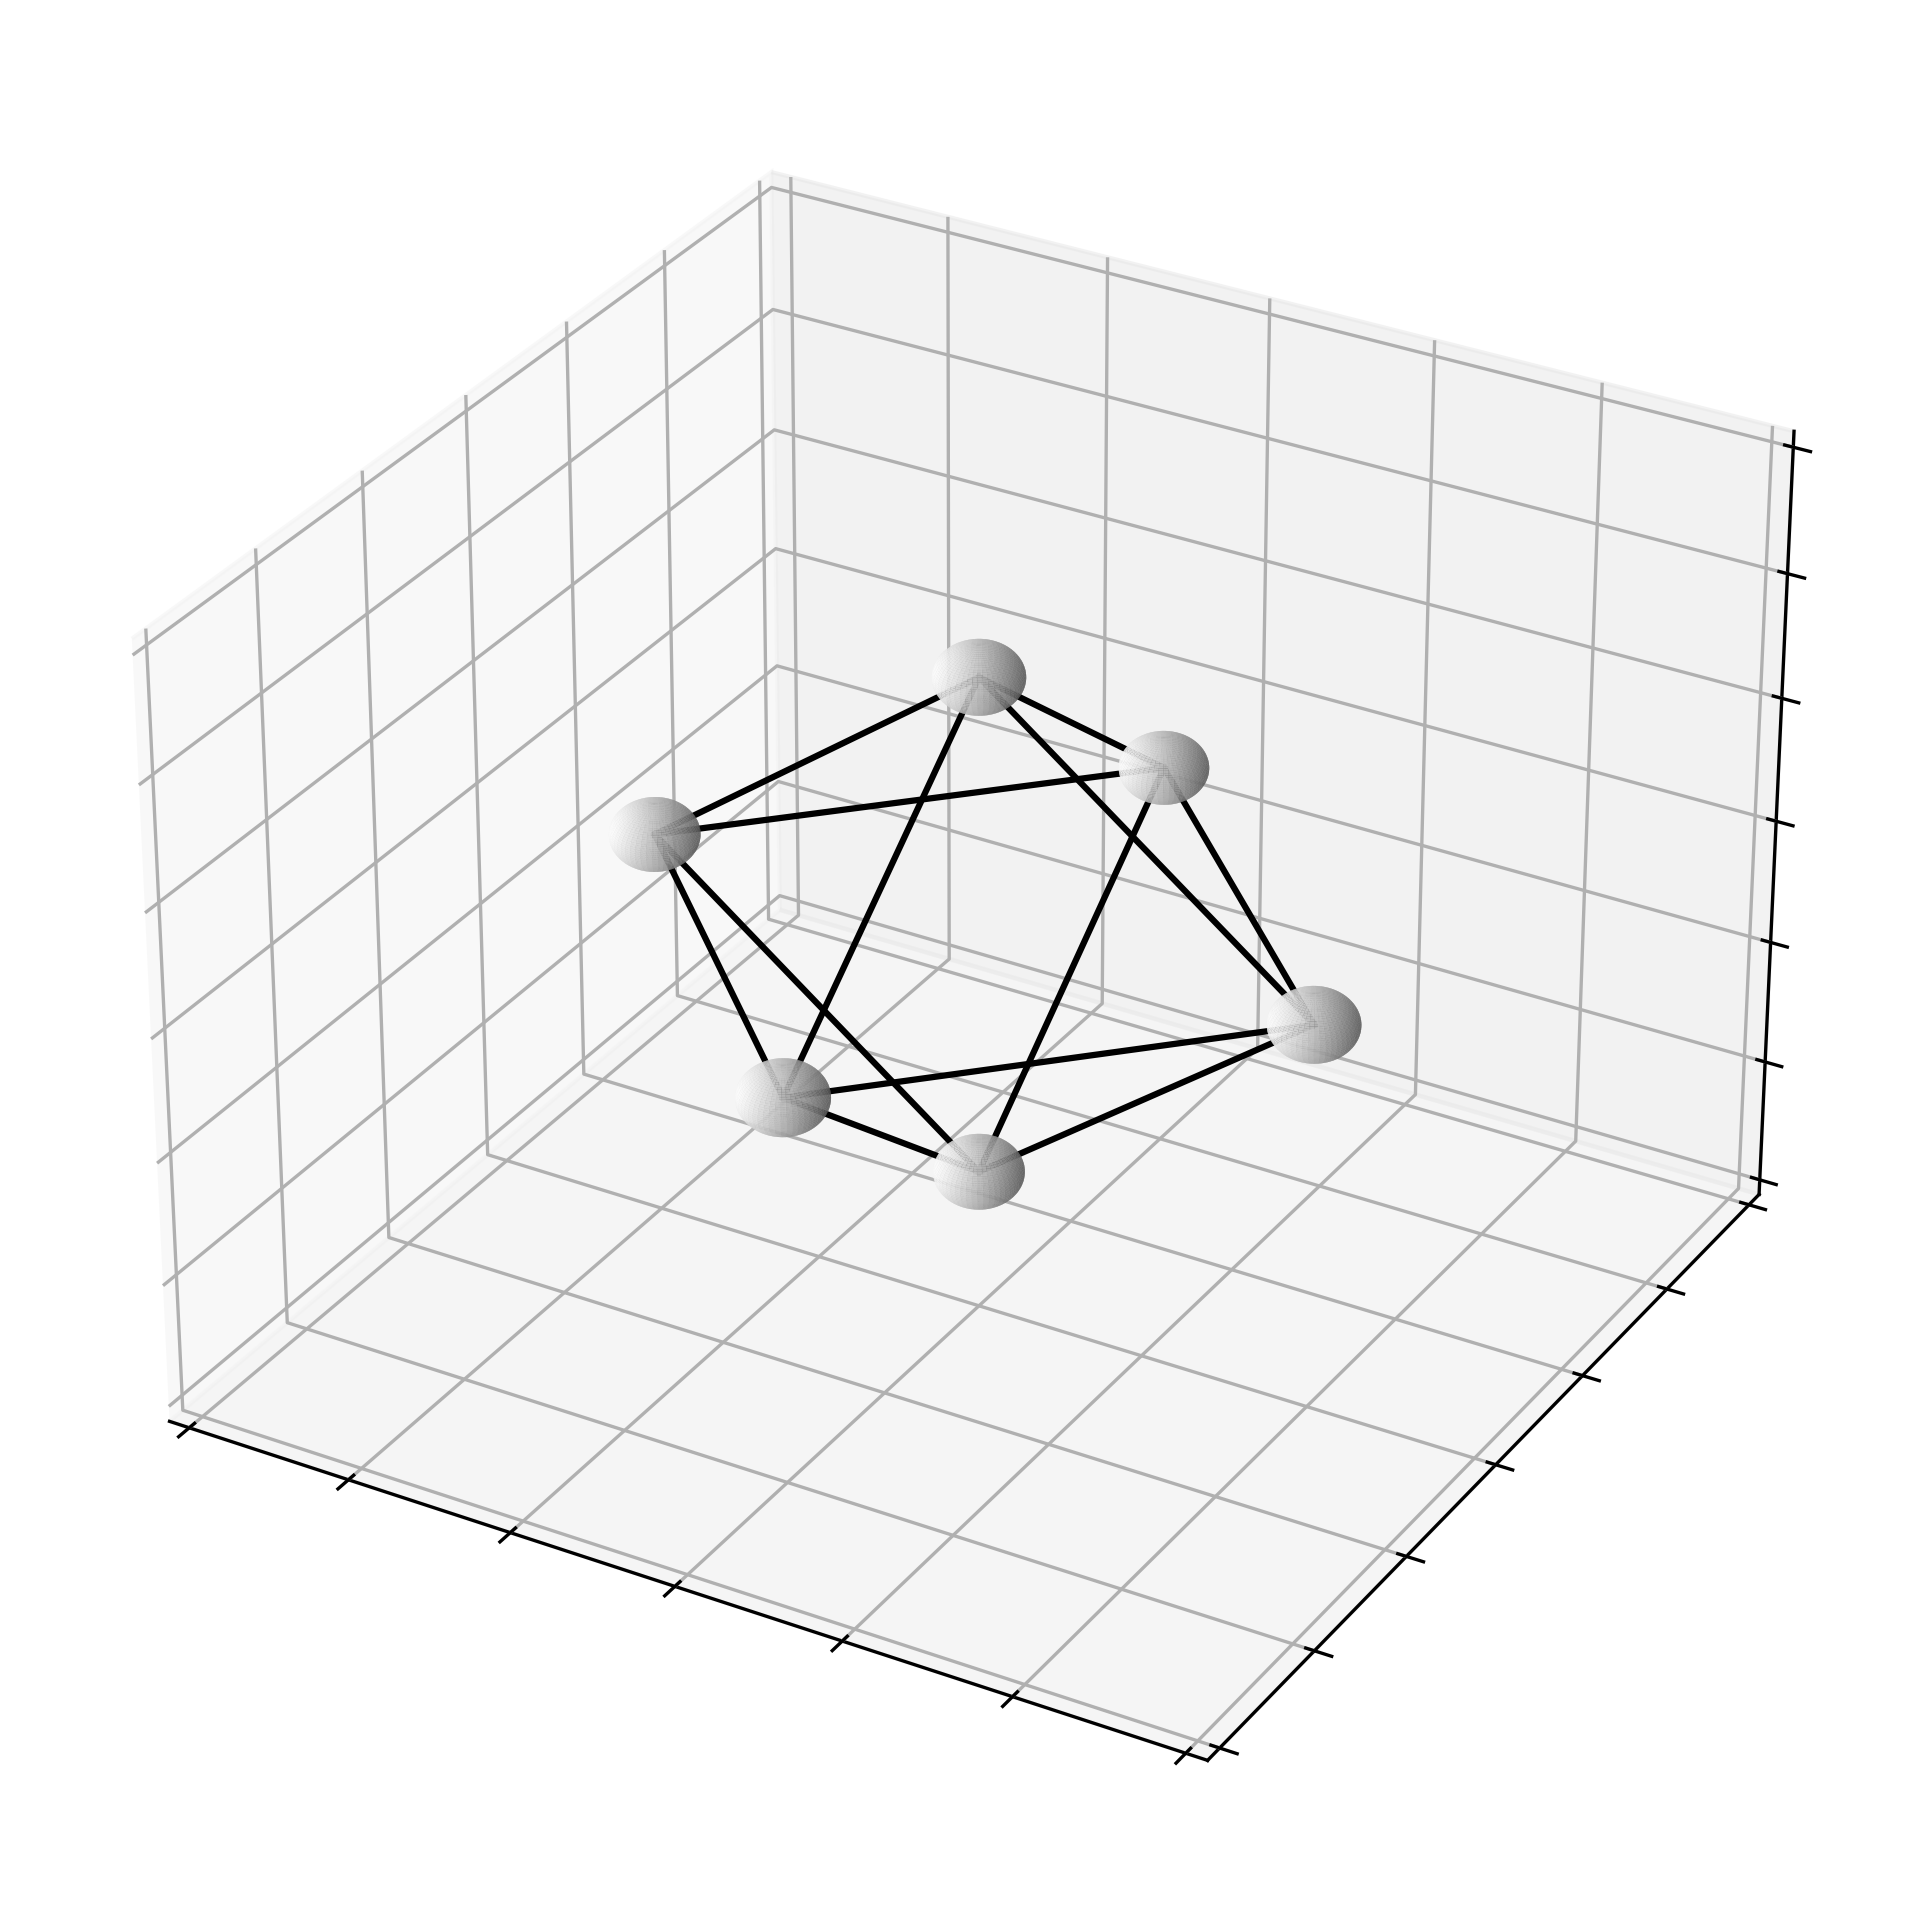

In [151]:
proj_operator = point_proj_operator("A_plus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(6)
print("The basis set under the action of the projection operator\n")
print(np.around(proj_basis,3), "\n\n\n")
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 6))
print("The unique orthonormal basis consists of the following\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")
s_orbital_plot(orthonormal_basis, octahedral_vertices)

Finding SALCs belonging to the $E^{+}$ irreducible group

The basis set under the action of the projection operator

[[ 0.333 -0.167  0.333 -0.167 -0.167 -0.167]
 [-0.167  0.333 -0.167  0.333 -0.167 -0.167]
 [ 0.333 -0.167  0.333 -0.167 -0.167 -0.167]
 [-0.167  0.333 -0.167  0.333 -0.167 -0.167]
 [-0.167 -0.167 -0.167 -0.167  0.333  0.333]
 [-0.167 -0.167 -0.167 -0.167  0.333  0.333]] 



The unique orthonormal basis consists of the following

[ 0.577 -0.289  0.577 -0.289 -0.289 -0.289] 

[ 0.   0.5  0.   0.5 -0.5 -0.5] 



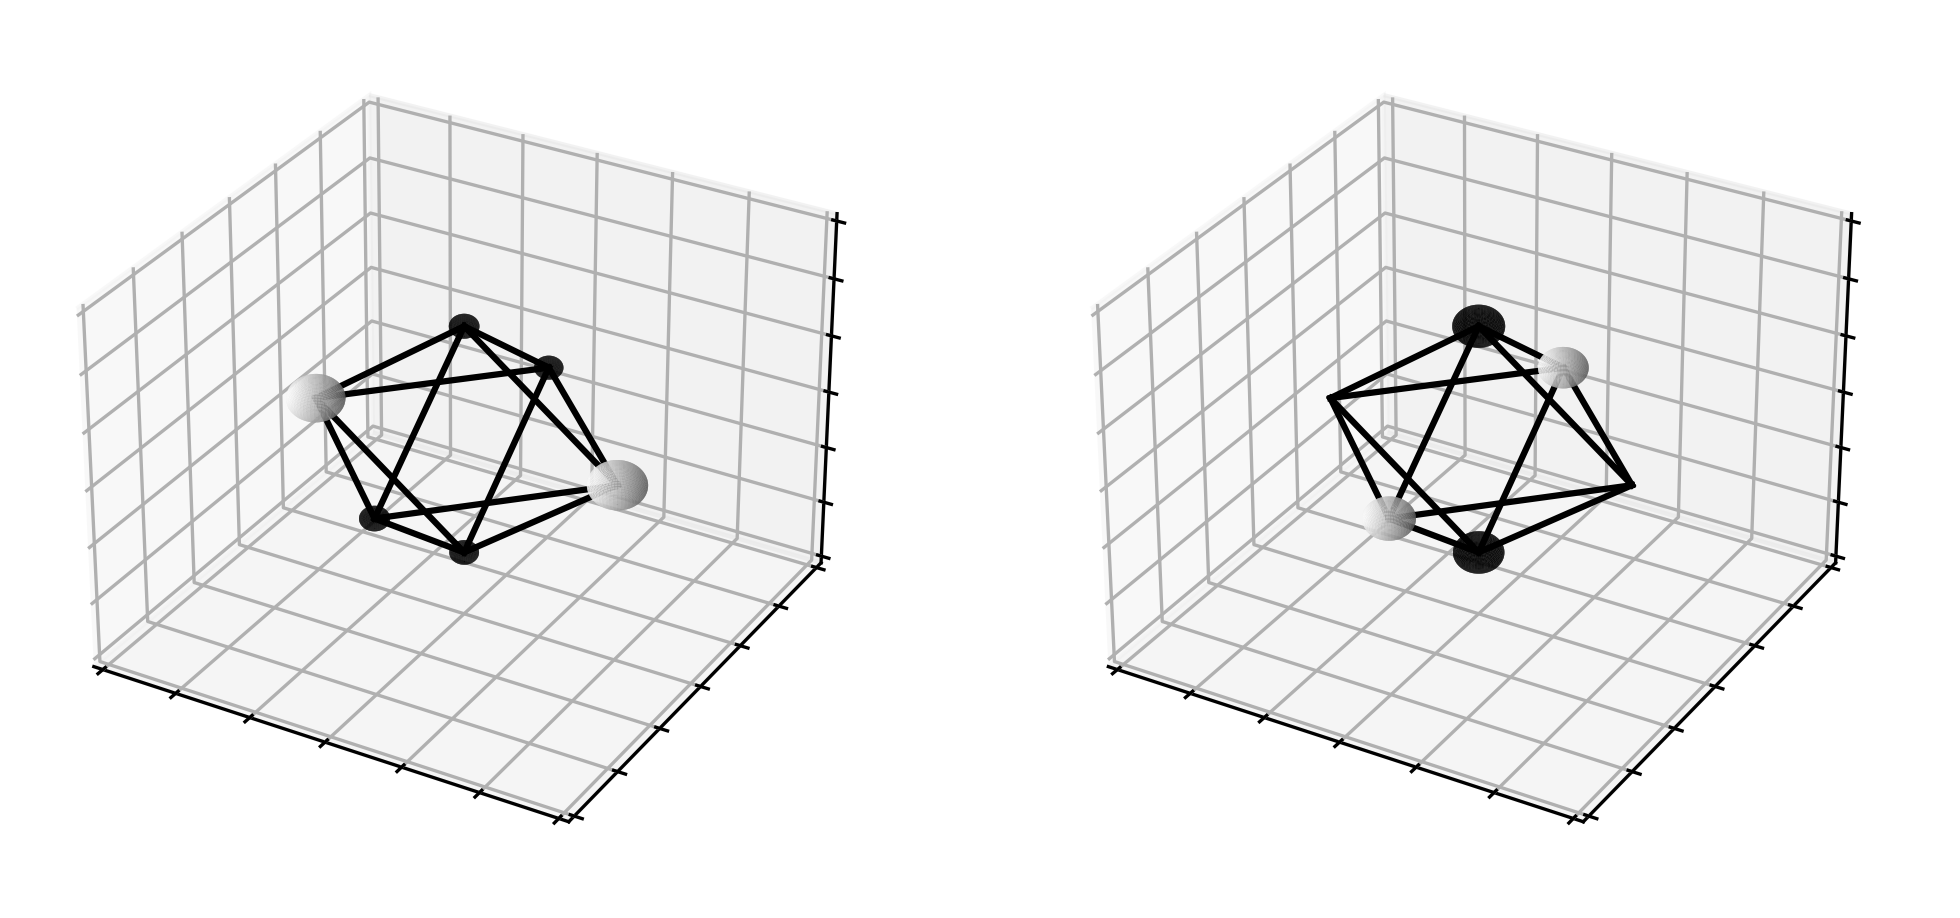

In [152]:
proj_operator = point_proj_operator("E_plus", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(6)
print("The basis set under the action of the projection operator\n")
print(np.around(proj_basis,3), "\n\n\n")
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 6))
print("The unique orthonormal basis consists of the following\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")
s_orbital_plot(orthonormal_basis, octahedral_vertices)

Finding SALCs belonging to the $T_1^{-}$ irreducible group

The basis set under the action of the projection operator

[[ 0.5  0.  -0.5  0.   0.   0. ]
 [ 0.   0.5  0.  -0.5  0.   0. ]
 [-0.5  0.   0.5  0.   0.   0. ]
 [ 0.  -0.5  0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.5 -0.5]
 [ 0.   0.   0.   0.  -0.5  0.5]] 



The unique orthonormal basis consists of the following

[ 0.707  0.    -0.707  0.     0.     0.   ] 

[ 0.     0.707  0.    -0.707  0.     0.   ] 

[ 0.     0.     0.     0.     0.707 -0.707] 



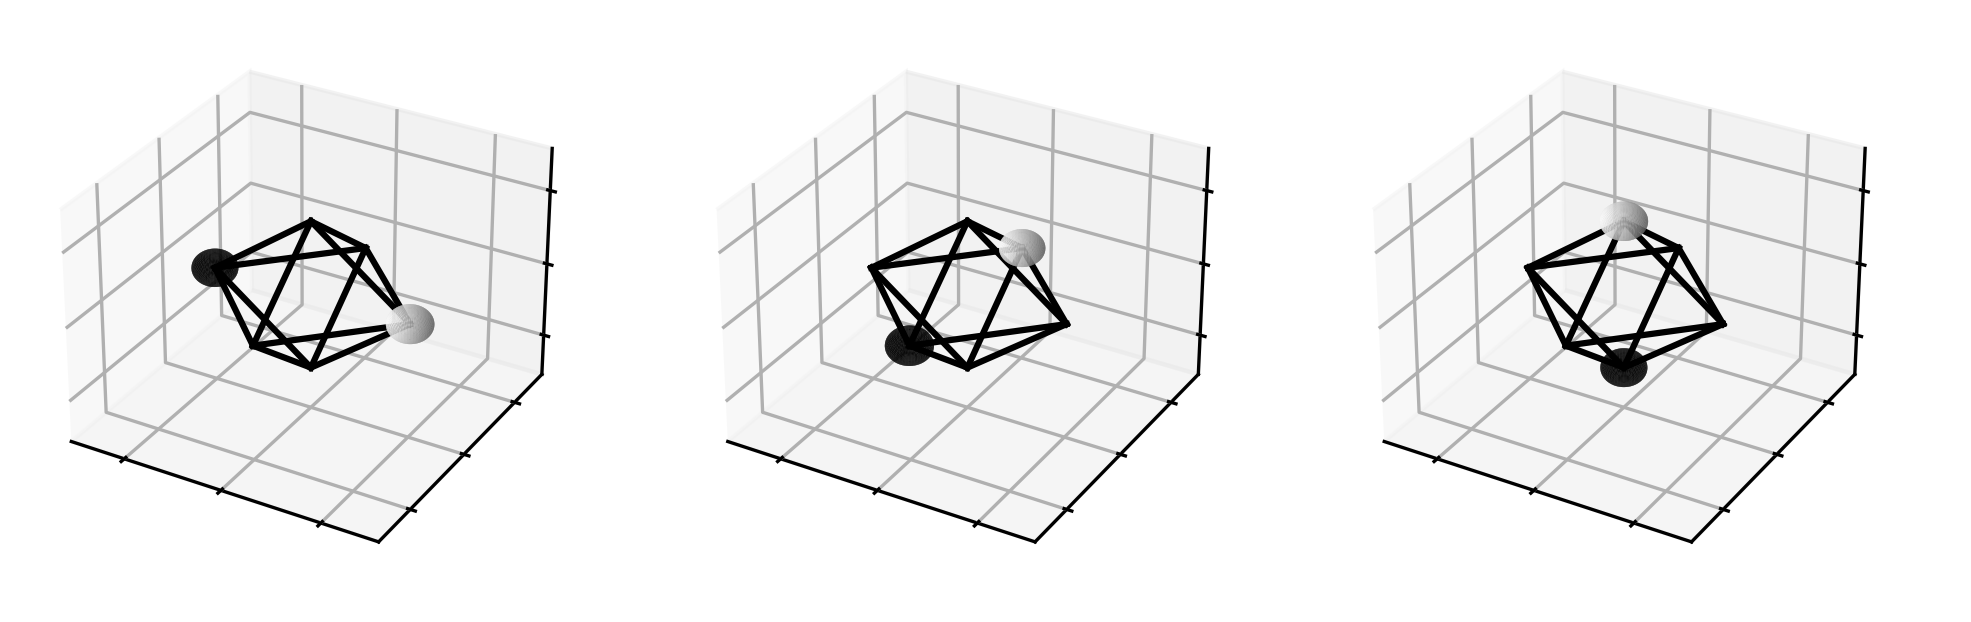

In [153]:
proj_operator = point_proj_operator("T_minus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(6)
print("The basis set under the action of the projection operator\n")
print(np.around(proj_basis,3), "\n\n\n")
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 6))
print("The unique orthonormal basis consists of the following\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")
s_orbital_plot(orthonormal_basis, octahedral_vertices)

<h5>Tetrahedral S-orbital SALCs</h5>

In [154]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in tet_char_table.items():

    rep_chars = []
    for cls in tet_classes:
        rep = point_representation(cls[0], tetrahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(tet_class_size, IR_chars)
    num = int((1/tet_order)*np.dot(row, rep_chars))
    print("{n} SALC(s) have {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) have A_1 symmetry
0 SALC(s) have A_2 symmetry
0 SALC(s) have E symmetry
0 SALC(s) have T_1 symmetry
1 SALC(s) have T_2 symmetry


Finding SALCs belonging to the $A_1$ irreducible group

The basis set under the action of the projection operator

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]] 



The unique orthonormal basis consists of the following

[0.5 0.5 0.5 0.5] 



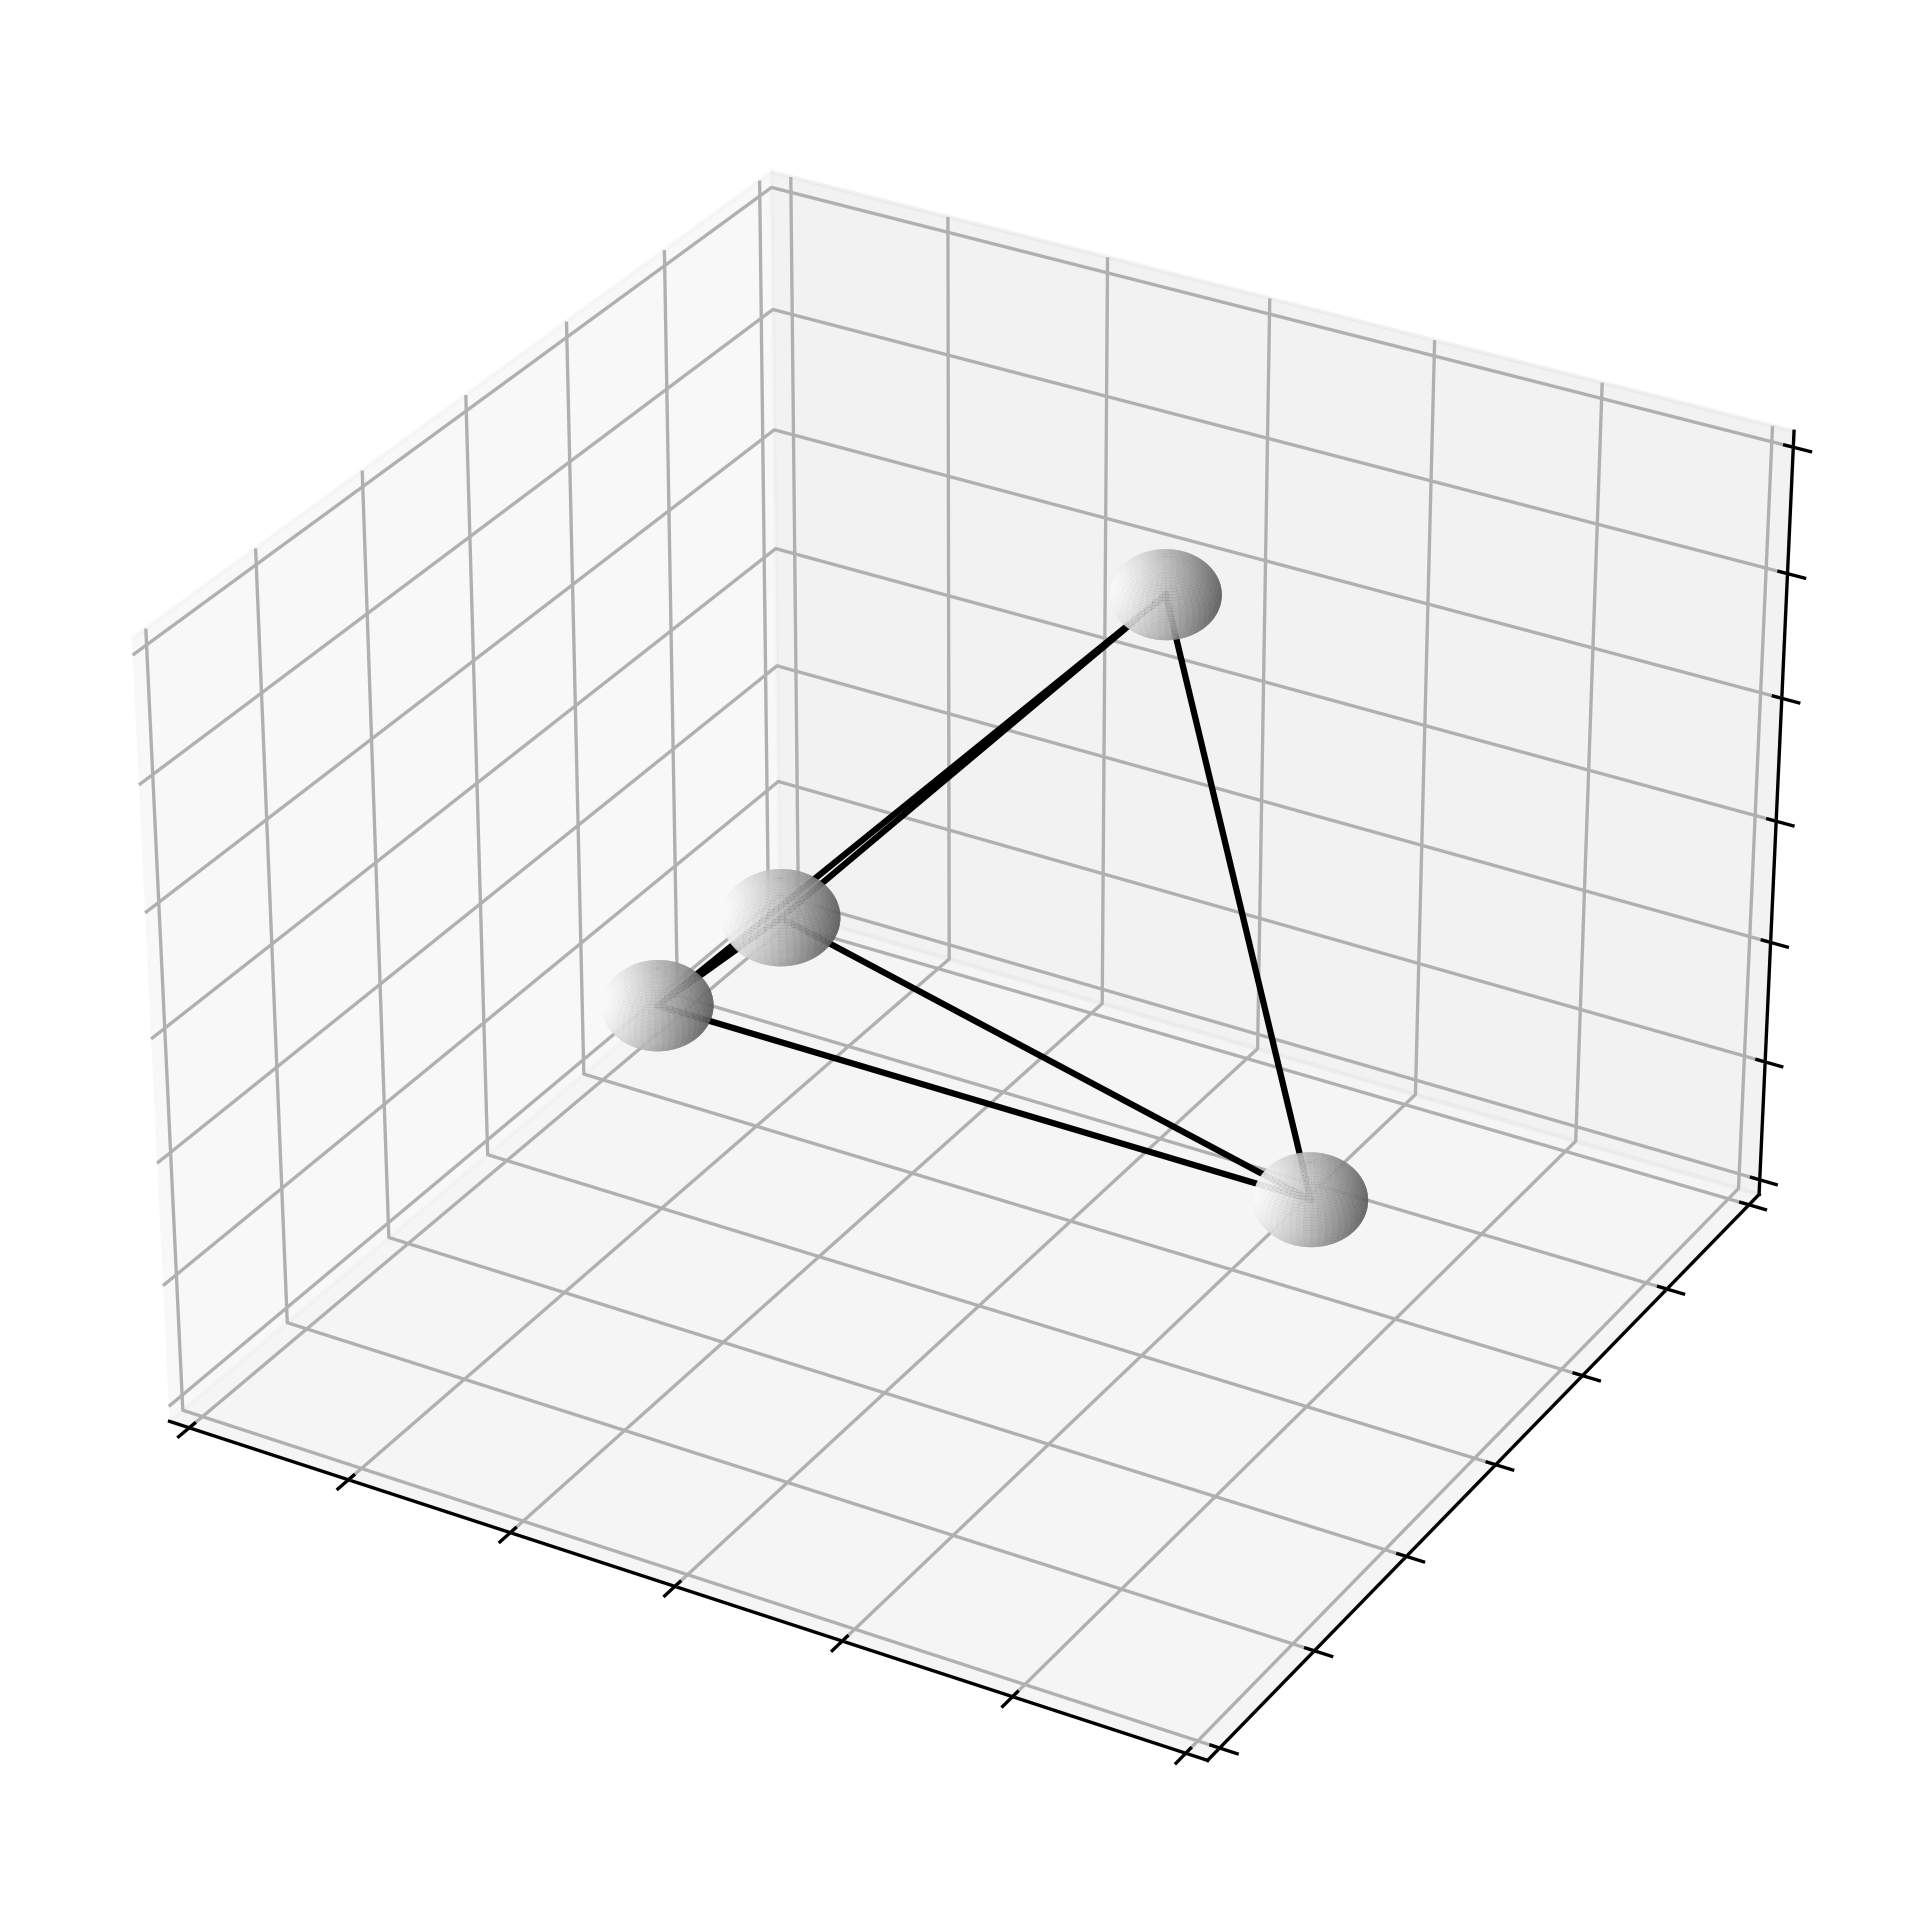

In [155]:
proj_operator = point_proj_operator("A_1", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(4)
print("The basis set under the action of the projection operator\n")
print(np.around(proj_basis,3), "\n\n\n")
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 4))
print("The unique orthonormal basis consists of the following\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")
s_orbital_plot(orthonormal_basis, tetrahedral_vertices)

Finding SALCs belonging to the $T_2$ irreducible group

The basis set under the action of the projection operator

[[ 0.75 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25  0.75]] 



The unique orthonormal basis consists of the following

[ 0.866 -0.289 -0.289 -0.289] 

[-0.     0.816 -0.408 -0.408] 

[-0.     0.     0.707 -0.707] 



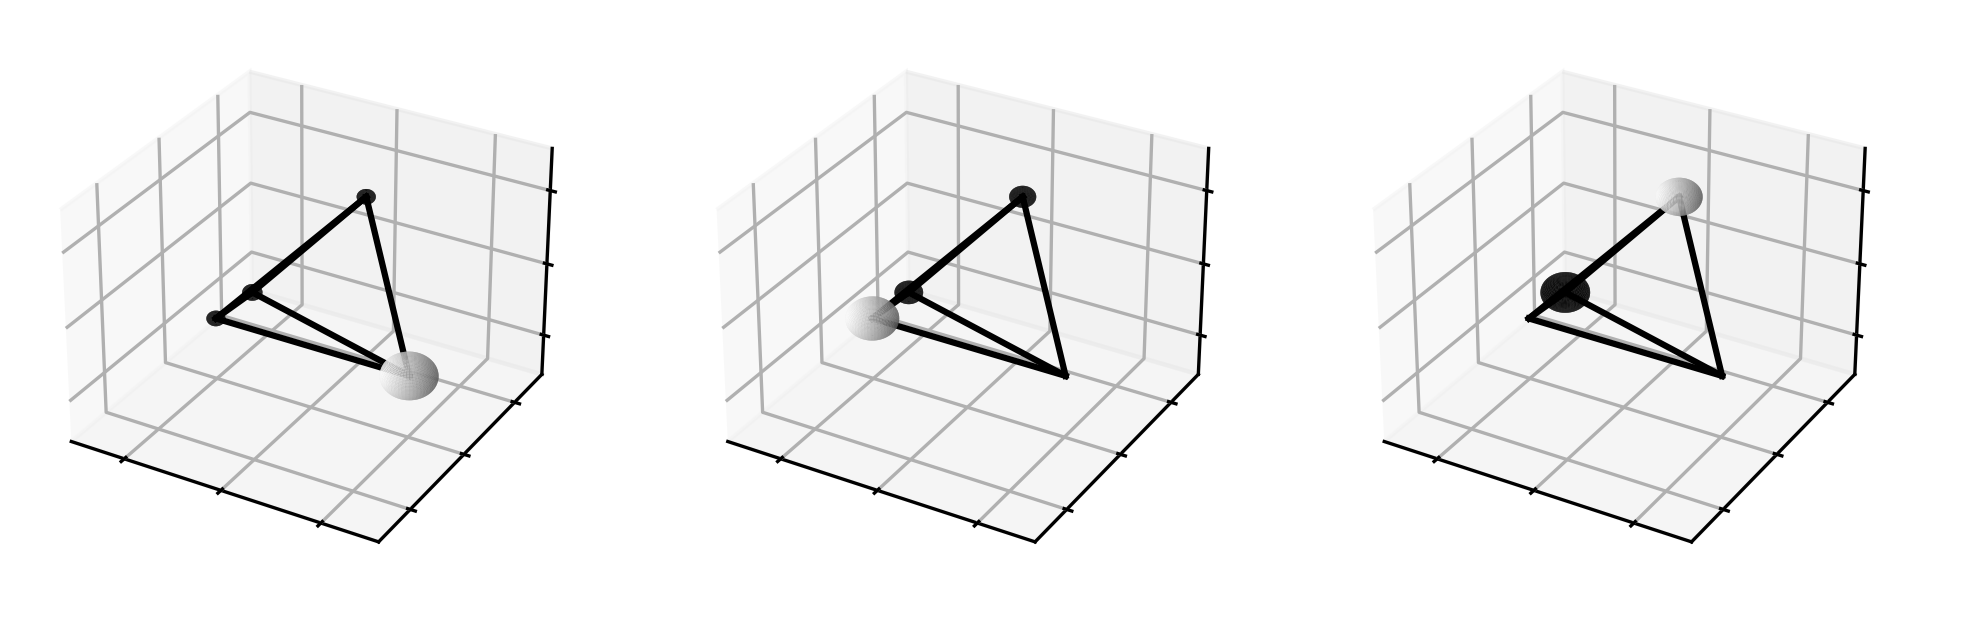

In [156]:
proj_operator = point_proj_operator("T_2", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(4)
print("The basis set under the action of the projection operator\n")
print(np.around(proj_basis,3), "\n\n\n")
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 4))
print("The unique orthonormal basis consists of the following\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")
s_orbital_plot(orthonormal_basis, tetrahedral_vertices)

<h3>P-orbital Representations</h3>

P-orbitals transform as vectors located at each of the vertices.

In [157]:
def vector_representation(element : np.ndarray, vertices : np.ndarray) -> np.ndarray:
    """generate representations of the group elements based on their action on the vectors located at each vertex"""
    _, n = vertices.shape
    v = np.eye(3)
    rep = np.zeros((3*n, 3*n), dtype=np.float64)
    transformed_vertices = element @ vertices
    p = permutation_matrix(vertices, transformed_vertices)
    for i in range(n):
        for j in range(n):
                if p[i,j]:
                    rep[3*i:3*i+3,3*j:3*j+3] = element        
    return rep


<h5>Octahedral P-orbital SALCs</h5>

In [158]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in oct_char_table.items():

    rep_chars = []
    for cls in oct_classes:
        rep = vector_representation(cls[0], octahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(oct_class_size, IR_chars)
    num = int(np.around((1/oct_order)*np.dot(row, rep_chars), 3))
    print("{n} SALC(s) have {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) have A_plus_1 symmetry
0 SALC(s) have A_plus_2 symmetry
1 SALC(s) have E_plus symmetry
2 SALC(s) have T_minus_1 symmetry
1 SALC(s) have T_minus_2 symmetry
0 SALC(s) have A_minus_1 symmetry
0 SALC(s) have A_minus_2 symmetry
0 SALC(s) have E_minus symmetry
1 SALC(s) have T_plus_1 symmetry
1 SALC(s) have T_plus_2 symmetry


In [159]:
def vector_proj_operator(IR_key: str, class_list: list, char_table: dict, IR_dim: list, vertices) -> np.ndarray:
    """generate the projection operator"""
    _, basis_dim = vertices.shape
    proj_operator = np.zeros((3*basis_dim,3*basis_dim), dtype=np.float64)
    h = sum([len(cls) for cls in class_list])
    for i, cls in enumerate(class_list):
        for element in cls:
            proj_operator += char_table[IR_key][i] * vector_representation(element, vertices)
    for i, key in enumerate(char_table.keys()):
        if key == IR_key:
            n = i
    proj_operator *= (IR_dim[n]/h)
    return proj_operator


Finding SALCs belonging to the $A_1^{+}$ irreducible group

In [160]:
proj_operator = vector_proj_operator("A_plus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 18))
print("The unique orthonormal basis consists of the following")
for v in orthonormal_basis:
    print(np.around(v,3))

The unique orthonormal basis consists of the following
[ 0.408 -0.     0.     0.     0.408  0.    -0.408  0.    -0.     0.
 -0.408  0.     0.     0.     0.408  0.     0.    -0.408]


Finding SALCs belonging to the $E^{+}$ irreducible group

In [161]:
proj_operator = vector_proj_operator("E_plus", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 18))
print("The unique orthonormal basis consists of the following")
for v in orthonormal_basis:
    print(np.around(v,3))

The unique orthonormal basis consists of the following
[ 0.577 -0.     0.     0.    -0.289  0.    -0.577  0.    -0.     0.
  0.289  0.     0.     0.    -0.289  0.     0.     0.289]
[-0.  -0.   0.   0.   0.5 -0.   0.   0.  -0.  -0.  -0.5  0.   0.   0.
 -0.5  0.   0.   0.5]


Finding SALCs belonging to the $T_1^{-}$ irreducible group

In [162]:
proj_operator = vector_proj_operator("T_minus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 18))
print("The unique orthonormal basis consists of the following", "\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")

The unique orthonormal basis consists of the following 

[ 0.707 -0.     0.     0.     0.     0.     0.707 -0.     0.     0.
  0.     0.     0.    -0.     0.     0.    -0.     0.   ] 

[ 0.   0.5 -0.  -0.   0.  -0.   0.   0.5 -0.  -0.   0.  -0.   0.   0.5
  0.   0.   0.5  0. ] 

[-0.   0.   0.5 -0.   0.   0.5 -0.   0.   0.5 -0.   0.   0.5 -0.   0.
  0.  -0.   0.   0. ] 

[-0.   0.   0.   0.5 -0.   0.  -0.   0.   0.   0.5 -0.   0.   0.5 -0.
 -0.   0.5 -0.  -0. ] 

[-0.    -0.     0.     0.     0.707 -0.    -0.    -0.     0.     0.
  0.707 -0.     0.    -0.     0.     0.    -0.     0.   ] 

[ 0.    -0.    -0.     0.    -0.    -0.     0.    -0.    -0.     0.
 -0.    -0.    -0.     0.     0.707 -0.     0.     0.707] 



Finding SALCs belonging to the $T_2^{-}$ irreducible group

In [163]:
proj_operator = vector_proj_operator("T_minus_2", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 18))
print("The unique orthonormal basis consists of the following", "\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")

The unique orthonormal basis consists of the following 

[-0.   0.5 -0.   0.  -0.   0.  -0.   0.5 -0.   0.  -0.   0.  -0.  -0.5
  0.  -0.  -0.5  0. ] 

[-0.   0.   0.5  0.   0.  -0.5 -0.   0.   0.5  0.   0.  -0.5  0.   0.
 -0.   0.   0.  -0. ] 

[-0.   0.  -0.   0.5  0.   0.  -0.   0.  -0.   0.5  0.   0.  -0.5  0.
 -0.  -0.5  0.  -0. ] 



<h5>Tetrahedral P-orbital SALCs</h5>

In [164]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in tet_char_table.items():

    rep_chars = []
    for cls in tet_classes:
        rep = vector_representation(cls[0], tetrahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(tet_class_size, IR_chars)
    num = int(np.around((1/tet_order)*np.dot(row, rep_chars), 3))
    print("{n} SALC(s) with {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) with A_1 symmetry
0 SALC(s) with A_2 symmetry
1 SALC(s) with E symmetry
1 SALC(s) with T_1 symmetry
2 SALC(s) with T_2 symmetry


In [165]:
proj_operator = vector_proj_operator("A_1", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(12)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))
print("The unique orthonormal basis consists of the following", "\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")

The unique orthonormal basis consists of the following 

[ 0.408 -0.    -0.289 -0.408  0.    -0.289  0.     0.408  0.289 -0.
 -0.408  0.289] 



In [166]:
proj_operator = vector_proj_operator("E", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(12)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))
print("The unique orthonormal basis consists of the following", "\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")

The unique orthonormal basis consists of the following 

[ 0.289  0.     0.408 -0.289  0.     0.408 -0.     0.289 -0.408 -0.
 -0.289 -0.408] 

[-0.   0.5 -0.  -0.  -0.5  0.   0.5 -0.   0.  -0.5 -0.  -0. ] 



In [167]:
proj_operator = vector_proj_operator("T_1", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(12)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))
print("The unique orthonormal basis consists of the following", "\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")

The unique orthonormal basis consists of the following 

[ 0.354  0.     0.5    0.354 -0.    -0.5   -0.354  0.    -0.    -0.354
 -0.    -0.   ] 

[ 0.     0.612  0.     0.    -0.204 -0.    -0.408 -0.204  0.289  0.408
 -0.204 -0.289] 

[ 0.     0.    -0.     0.     0.577  0.     0.289 -0.289  0.408 -0.289
 -0.289 -0.408] 



In [168]:
proj_operator = vector_proj_operator("T_2", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(12)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))
print("The unique orthonormal basis consists of the following", "\n")
for v in orthonormal_basis:
    print(np.around(v,3), "\n")

The unique orthonormal basis consists of the following 

[ 0.791  0.    -0.224  0.158 -0.     0.224  0.158 -0.316  0.     0.158
  0.316  0.   ] 

[-0.     0.612  0.     0.     0.612 -0.     0.     0.204 -0.289 -0.
  0.204  0.289] 

[-0.    -0.     0.671 -0.211 -0.     0.075  0.316 -0.105  0.373  0.316
  0.105  0.373] 

[-0.    -0.     0.     0.745  0.     0.211  0.224  0.373  0.105  0.224
 -0.373  0.105] 

[ 0.     0.     0.     0.     0.     0.632 -0.447  0.     0.316 -0.447
 -0.     0.316] 

[ 0.    -0.    -0.    -0.    -0.    -0.     0.     0.577  0.408  0.
  0.577 -0.408] 

